In [4]:
suppressMessages({
    library(MOFA2)
    library(ggplot2)
    library(cowplot)
    library(data.table)
    library(purrr)
    library(reticulate)
    library(Seurat)
    library(Signac)
    library(MOFA2)
    library(msigdbr)
    library(ggbio)
    library(magrittr)
    library(ArchR)
})

In [83]:
library(ggthemes)


Attaching package: 'ggthemes'


The following object is masked from 'package:cowplot':

    theme_map




In [5]:
MOFA   <- MOFA2::load_model("../data/sorted_10k_trained_mofa.rds")
Seurat <- readRDS("../data/sorted_10k_seurat.rds")
Arrow  <- getMatrixFromArrow("../data/10k_unsorted.arrow", 'GeneScoreMatrix') 

Warning message in .quality_control(object, verbose = verbose):
"Factor(s) 1, 2 are strongly correlated with the total number of expressed features for at least one of your omics. Such factors appear when there are differences in the total 'levels' between your samples, *sometimes* because of poor normalisation in the preprocessing steps.
"
ArchR logging to : ArchRLogs/ArchR-getMatrixFromArrow-a7121b658-Date-2020-12-05_Time-12-51-10.log
If there is an issue, please report to github with logFile!

2020-12-05 12:51:10 : Getting GeneScoreMatrix from ArrowFile : 10k_unsorted.arrow, 0.004 mins elapsed.

2020-12-05 12:51:31 : Organizing SE GeneScoreMatrix from ArrowFile : 10k_unsorted.arrow, 0.344 mins elapsed.



In [6]:
head(Seurat@meta.data[,c("celltype", "broad_celltype","pass_rnaQC","pass_accQC")])

,celltype,broad_celltype,pass_rnaQC,pass_accQC
,<chr>,<chr>,<lgl>,<lgl>
AAACAGCCAAGGAATC-1,CD4 Naive,Lymphoid,TRUE,TRUE
AAACAGCCAATCCCTT-1,CD4 Memory,Lymphoid,TRUE,TRUE
AAACAGCCAATGCGCT-1,CD4 Naive,Lymphoid,TRUE,TRUE
AAACAGCCACACTAAT-1,CD8 Naive,Lymphoid,TRUE,TRUE
AAACAGCCACCAACCG-1,CD8 Naive,Lymphoid,TRUE,TRUE
AAACAGCCAGGATAAC-1,CD4 Naive,Lymphoid,TRUE,TRUE


In [7]:
# data has no failing QC
Seurat@meta.data[Seurat@meta.data$pass_rnaQC=="FALSE" || Seurat@meta.data$pass_rnaQC=="FALSE",c("celltype", "broad_celltype","pass_rnaQC","pass_accQC")]

celltype,broad_celltype,pass_rnaQC,pass_accQC
<chr>,<chr>,<lgl>,<lgl>


In [8]:
table(Seurat@meta.data$celltype)
table(Seurat@meta.data$broad_celltype)


     B cell progenitor        CD14+ Monocytes        CD16+ Monocytes 
                   522                   3369                    461 
            CD4 Memory              CD4 Naive           CD8 effector 
                  2227                   1952                    755 
             CD8 Naive         Dendritic cell Double negative T cell 
                  1297                    133                    147 
               NK cell                    pDC              Platelets 
                   477                    114                      2 
            pre-B cell 
                   453 


 Lymphoid   Myeloid Platelets 
     8077      3830         2 

In [9]:
samples_metadata(MOFA) <- Seurat@meta.data %>%
  tibble::rownames_to_column("sample") %>%
  as.data.table

In [105]:
options(repr.plot.width = 7, repr.plot.height = 7)
svg(file="factor_corelation.svg")
MOFA2::plot_factor_cor(MOFA)
dev.off()

png 
  2

Saving 6.67 x 6.67 in image



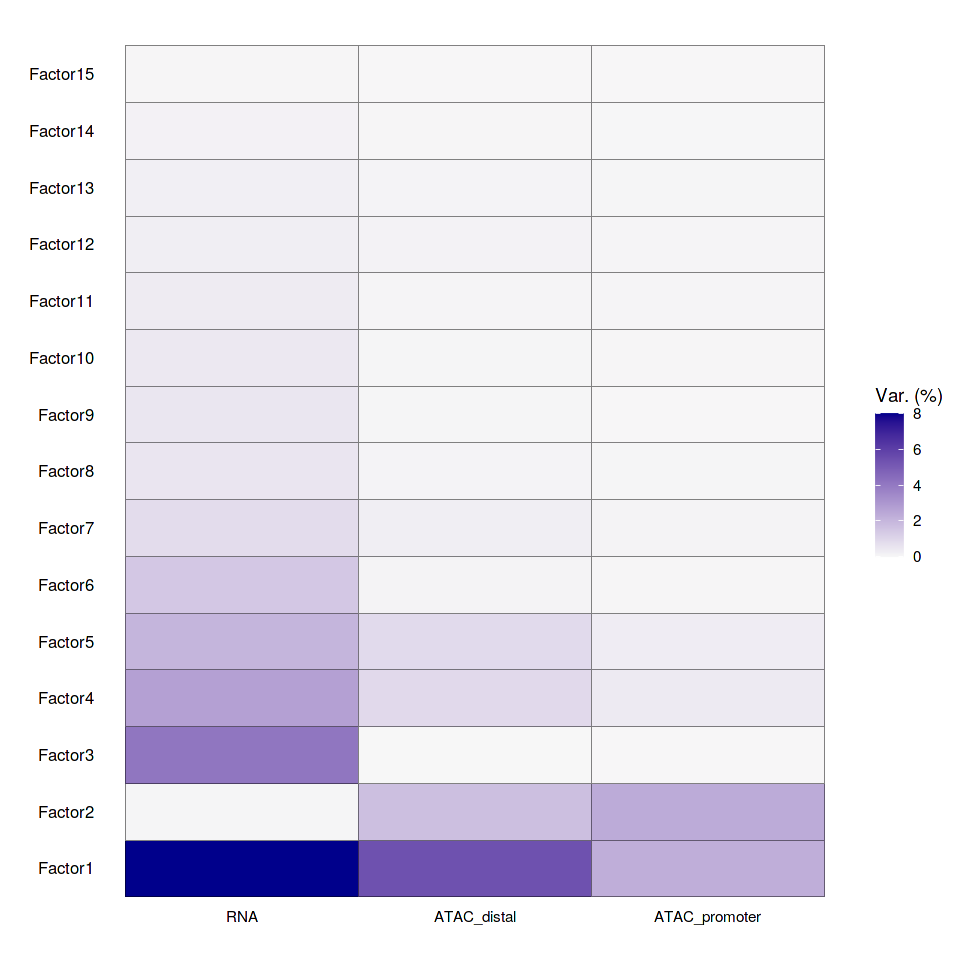

In [104]:
options(repr.plot.width = 8, repr.plot.height = 8)

# figure
MOFA2::plot_variance_explained(MOFA, max_r2 = 8) + scale_color_gdocs()

ggsave("variance_explained.svg")
# # title & captions
# title   <- ggdraw() + 
#     draw_label("Variance explained per factor",
#     fontface = 'bold') 

# caption <- ggdraw() +
#     draw_label("Variance explained per latent factor, split by data modality. Factor 1 explains\nabout 16% variance. The color scale is capped at 8% for better visibilty.",
#     fontface = 'italic') 

# cowplot::plot_grid(title, plot, caption, ncol = 1, rel_heights = c(0.2, 1, 0.1))

Saving 6.67 x 6.67 in image



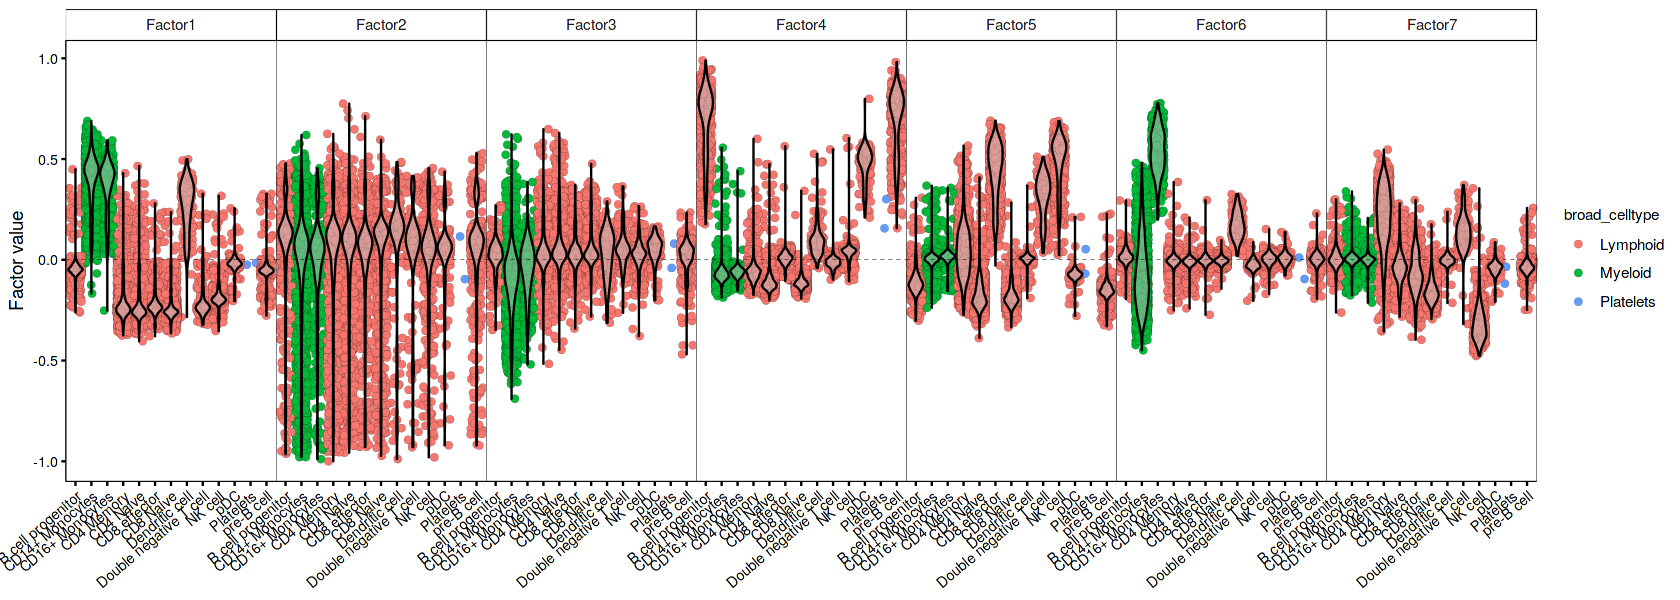

In [110]:
options(repr.plot.width = 14, repr.plot.height = 5)

MOFA2::plot_factor(MOFA,
                        factors=c(1,2, 3, 4, 5, 6, 7),
                        group_by = "celltype",
                        color_by = "broad_celltype",
                        add_violin = TRUE,
                        scale = TRUE) + scale_color_stata() +
  theme(axis.text.x = element_text(color="black",
                                   angle=40,
                                   vjust=1,
                                   hjust=1))
    

ggsave("factor_plot.svg")
# title   <- ggdraw() + draw_label(
#     "Latent factor 1-7",
#     fontface = 'bold') 

# caption <- ggdraw() + draw_label(
#     "Scaled factor scores, per cell. The Cells are split by cell type and colored by broad cell type.",
#     fontface = 'italic') 

# cowplot::plot_grid(title, plot, caption, ncol = 1, rel_heights = c(0.2, 1, 0.2))

In [117]:
options(repr.plot.width = 14, repr.plot.height = 7)

for (i in 1:7) {
    plot_weights(MOFA, 
      view = "RNA", nfeatures = 20, text_size = 4,
      factors = i)
    ggsave(paste0("weight_plot", i, ".svg"))
}
    


# plot_weights(MOFA, 
#   view = "RNA", nfeatures = 20, text_size = 4,
#   factors = 4)


# plot    <- cowplot::plot_grid(a, c, nrow = 1)
# title   <- ggdraw() + draw_label("Feature weights",
#                                  fontface = 'bold') 
# labels  <- plot_grid(
#     ggdraw() + draw_label("Factor 1", fontface = 'bold'),
#     ggdraw() + draw_label("Factor 4", fontface = 'bold'),
#     ncol = 2
# )
# caption <- ggdraw() + draw_label("Features ranked by their weight when calculating factor score.",
#     fontface = 'italic') 

# cowplot::plot_grid(title, labels, plot, caption, ncol = 1, rel_heights = c(0.2, 0.2, 1, 0.2))


Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



In [14]:
gsm       <- assays(Arrow)[['GeneScoreMatrix']]
row_data  <- rowData(Arrow)
genes     <- row_data["name"]
gsm_df    <- as.data.frame(as.matrix(gsm))
gsm_df    <- sapply(gsm_df + 0.5, as.integer) # round to nearest integer.
row.names(gsm_df) <- genes$name
colnames(gsm_df)  <- substring(colnames(gsm_df), 11, 30)

In [15]:
predictedSeurat <- CreateSeuratObject(
  gsm_df,
  project = "PredictedGeneExpresion",
  assay = "RNA",
  min.cells = 0,
  min.features = 0,
  names.field = 1,
  names.delim = "-",
  meta.data = NULL
)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [16]:
anchors <- FindIntegrationAnchors(object.list = c(predictedSeurat, Seurat), dims = 1:20)
combinedSeurat <- IntegrateData(anchorset = anchors, dims = 1:20)
DefaultAssay(combinedSeurat) <- "integrated"

# Run the standard workflow for visualization and clustering
combinedSeurat <- ScaleData(combinedSeurat, verbose = FALSE)
combinedSeurat <- RunPCA(combinedSeurat, npcs = 30, verbose = FALSE)
# t-SNE and Clustering
combinedSeurat <- RunUMAP(combinedSeurat, reduction = "pca", dims = 1:20)
combinedSeurat <- FindNeighbors(combinedSeurat, reduction = "pca", dims = 1:20)
combinedSeurat <- FindClusters(combinedSeurat, resolution = 0.5)

Computing 2000 integration features

No variable features found for object1 in the object.list. Running FindVariableFeatures ...

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 22779 anchors

Filtering anchors

	Retained 5036 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
"Adding a command log without an assay associated with it"
Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
12:56:09 UMAP embedding parameters a = 0.9922 b = 1.112

12:56:09 Read 23825 rows and found 20 numeric columns

12:56:09 Using Annoy for neighbor search, n_

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 23825
Number of edges: 942948

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9155
Number of communities: 15
Elapsed time: 5 seconds


In [17]:
combinedSeurat
Seurat

An object of class Seurat 
253137 features across 23825 samples within 5 assays 
Active assay: integrated (2000 features, 2000 variable features)
 4 other assays present: RNA, ATAC, ATAC_distal, ATAC_promoter
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
245459 features across 11909 samples within 4 assays 
Active assay: RNA (29732 features, 5000 variable features)
 3 other assays present: ATAC, ATAC_distal, ATAC_promoter

In [18]:
umap_tx = combinedSeurat@reductions$umap@cell.embeddings  %>% as.data.frame() %>% cbind(tx = combinedSeurat@meta.data$orig.ident)


Saving 6.67 x 6.67 in image



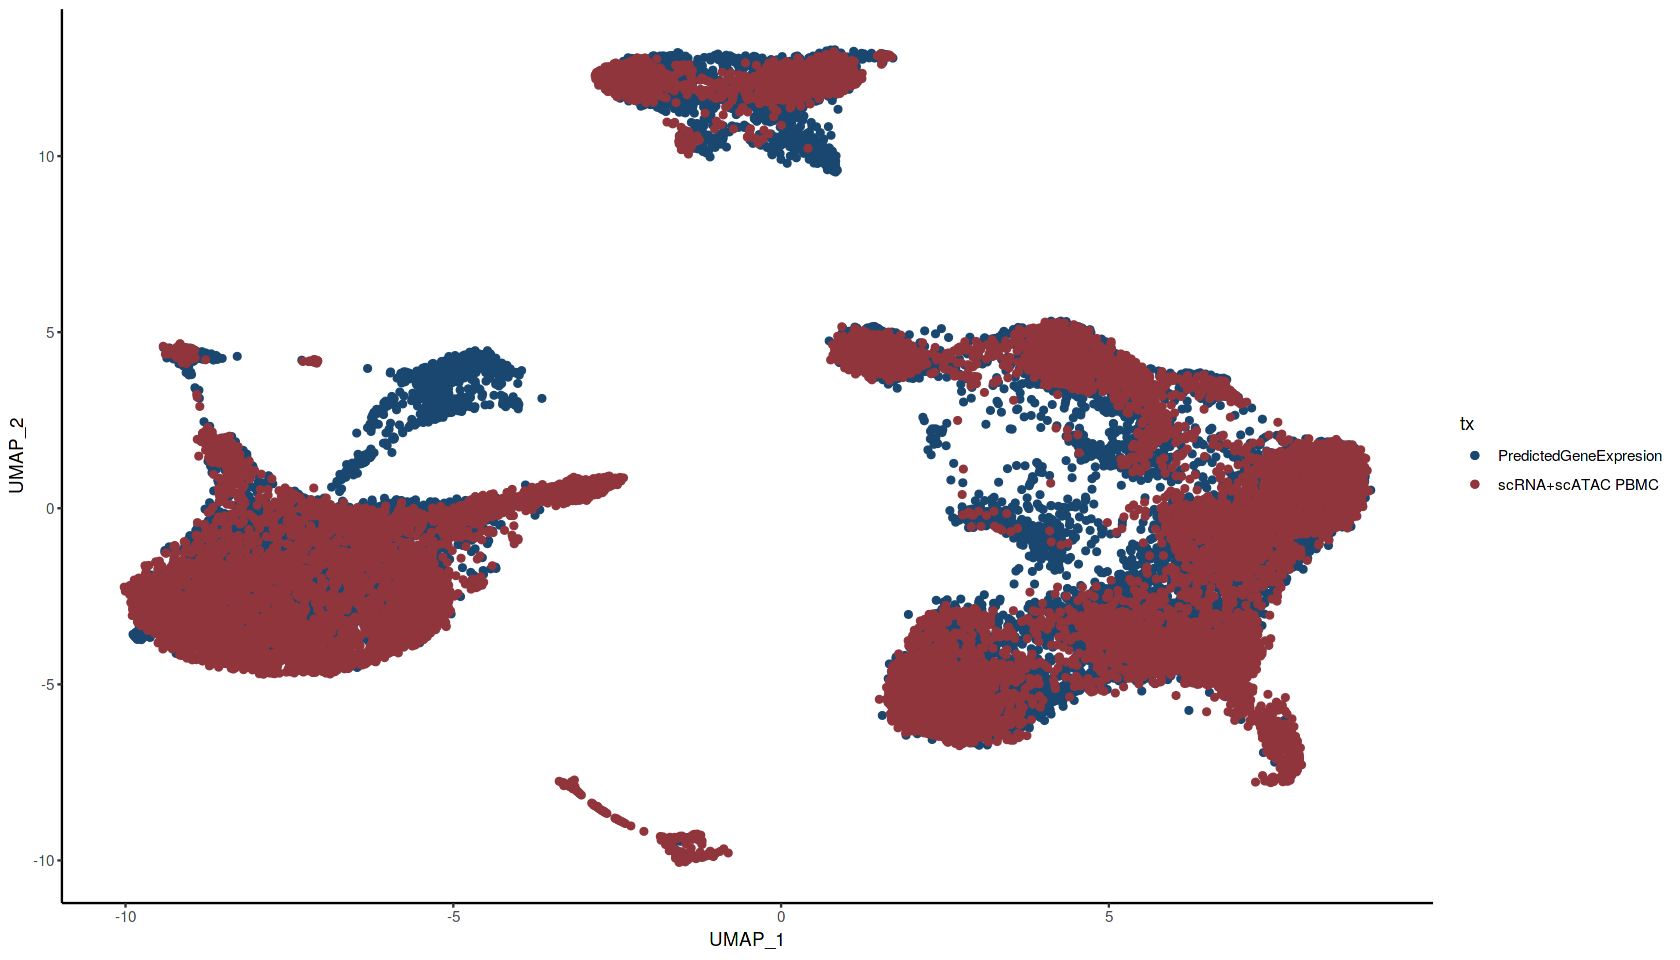

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



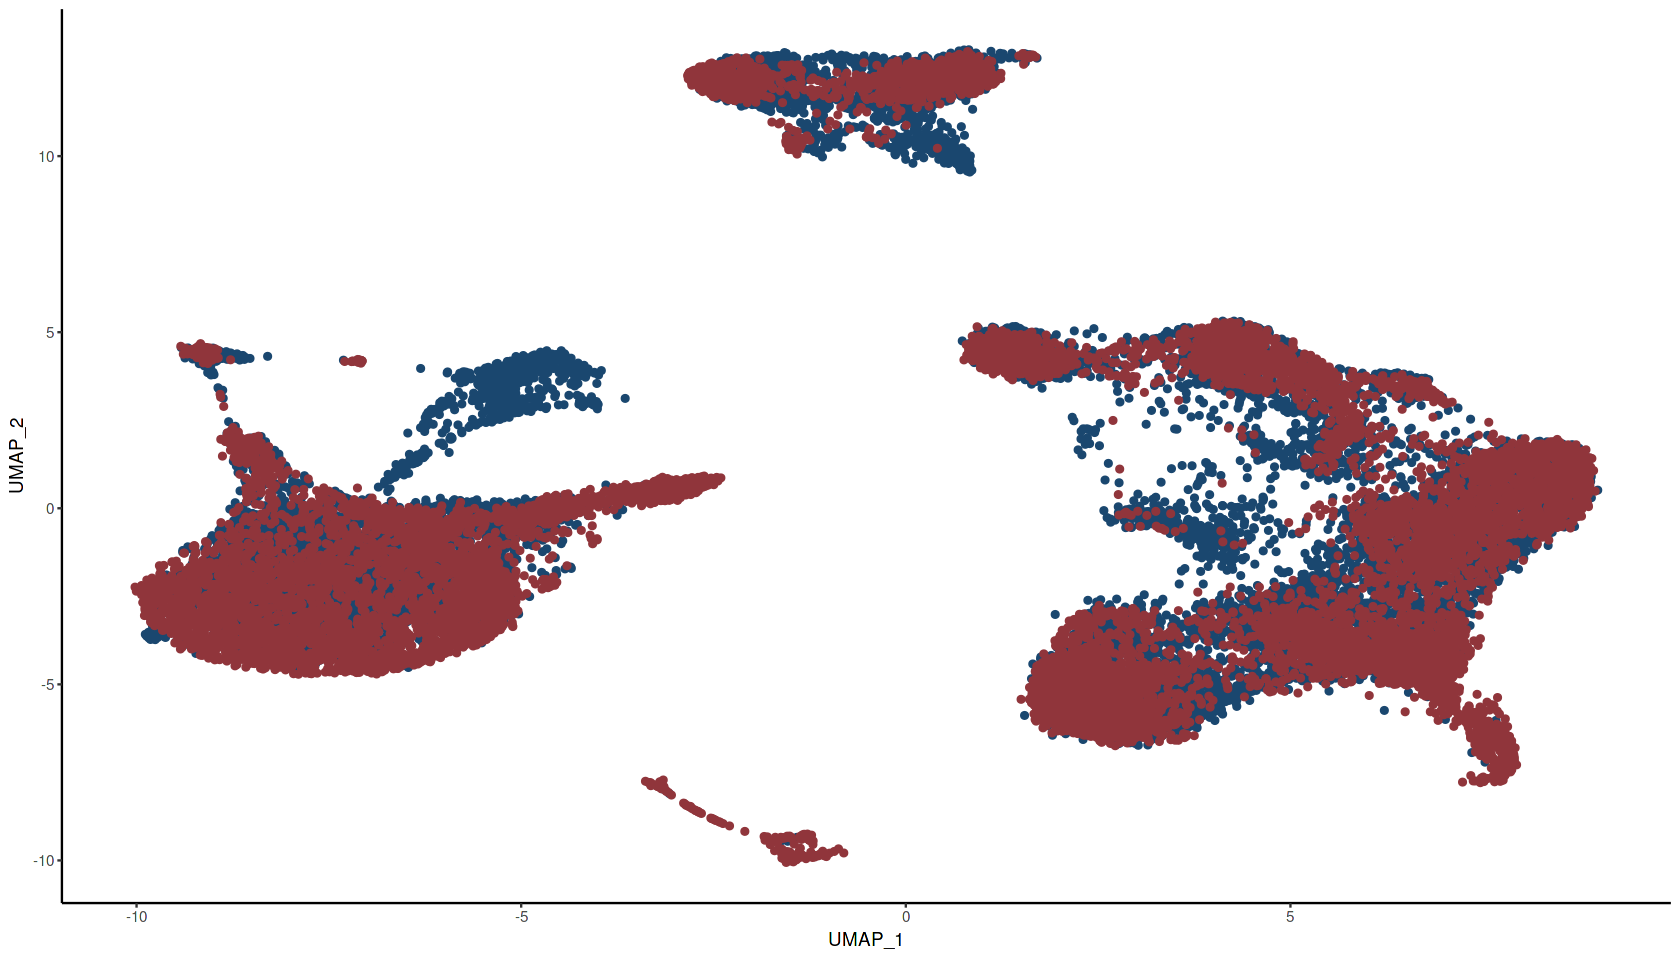

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



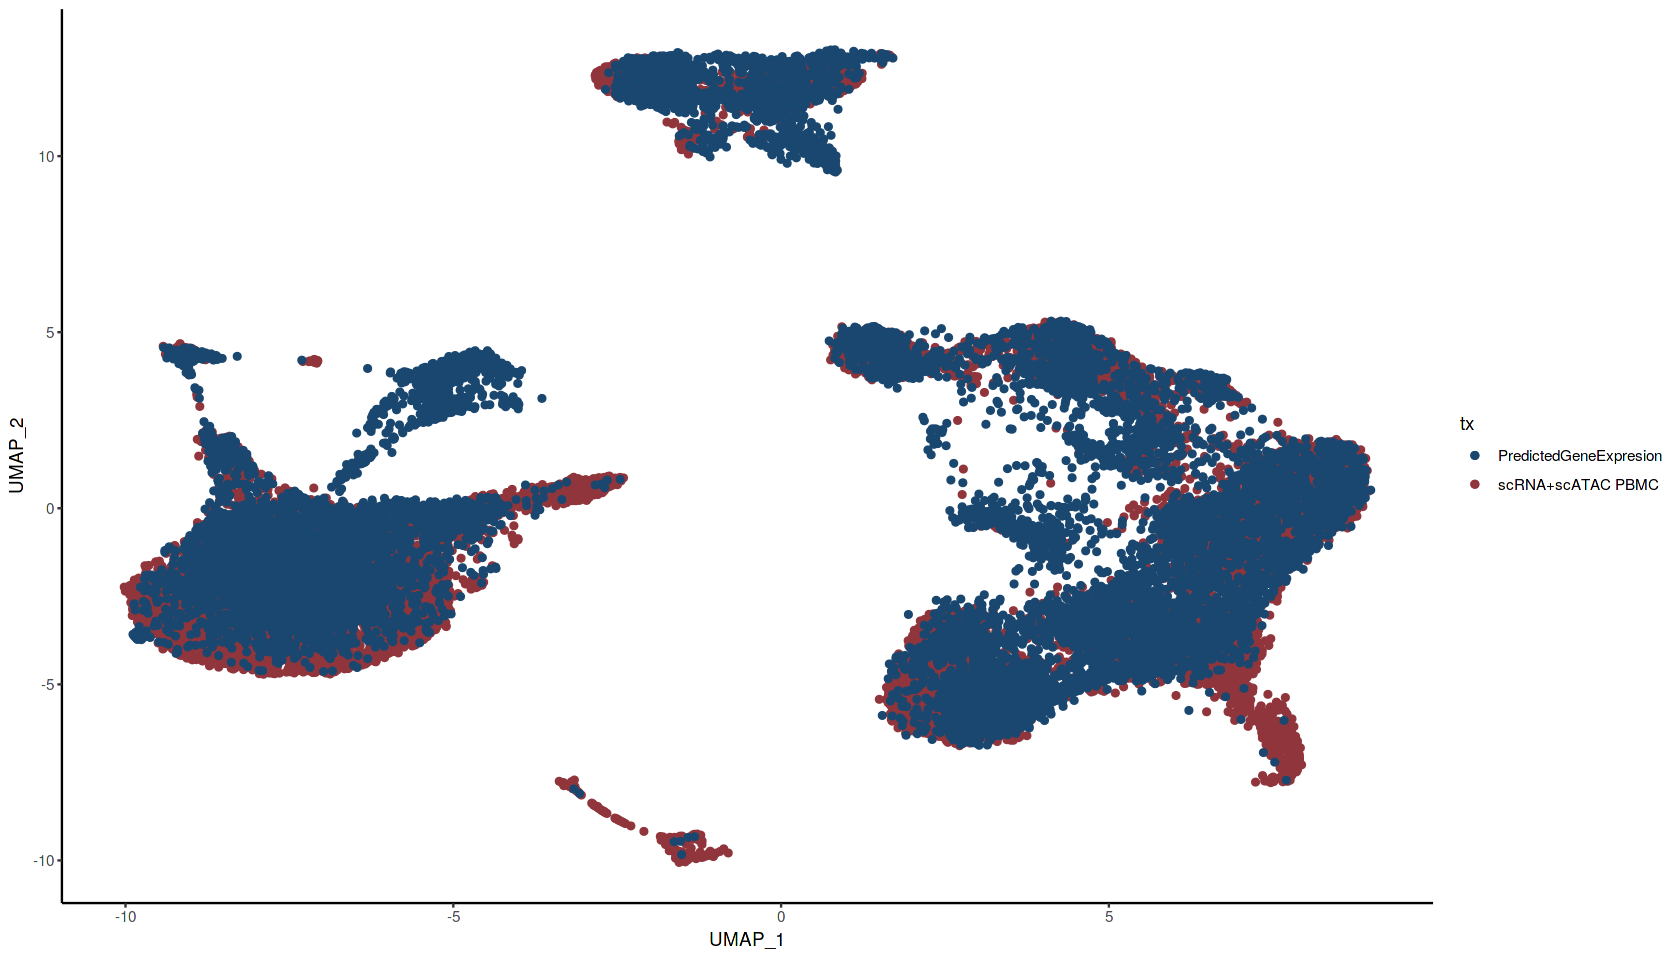

Saving 6.67 x 6.67 in image



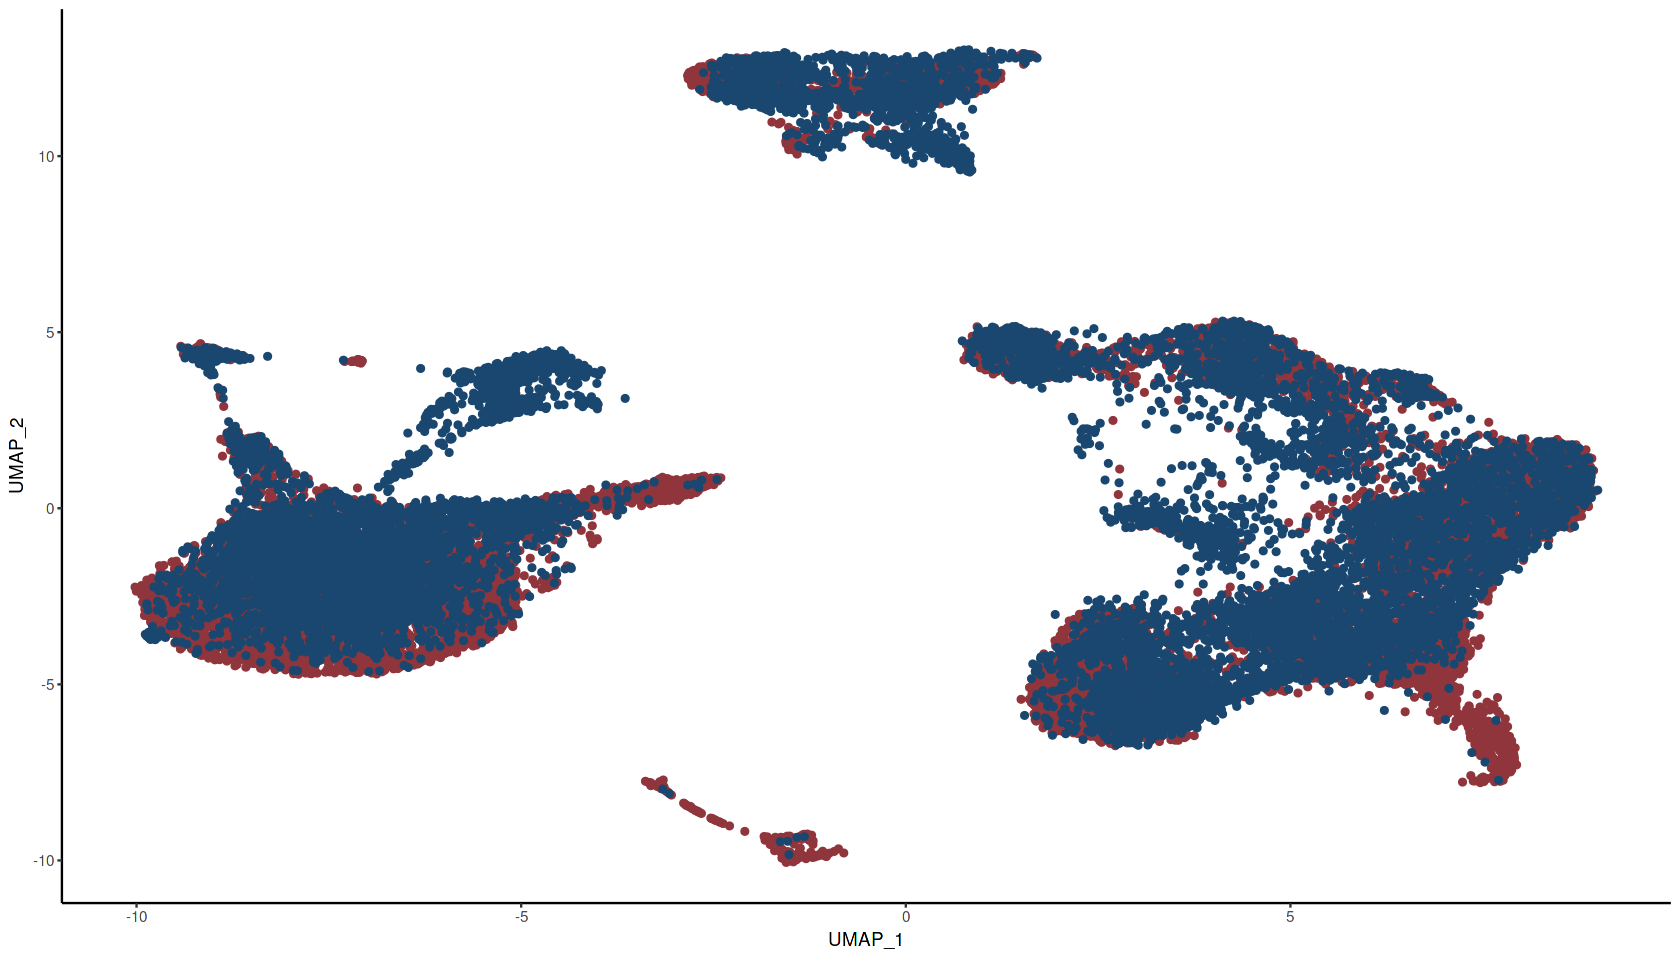

Saving 6.67 x 6.67 in image



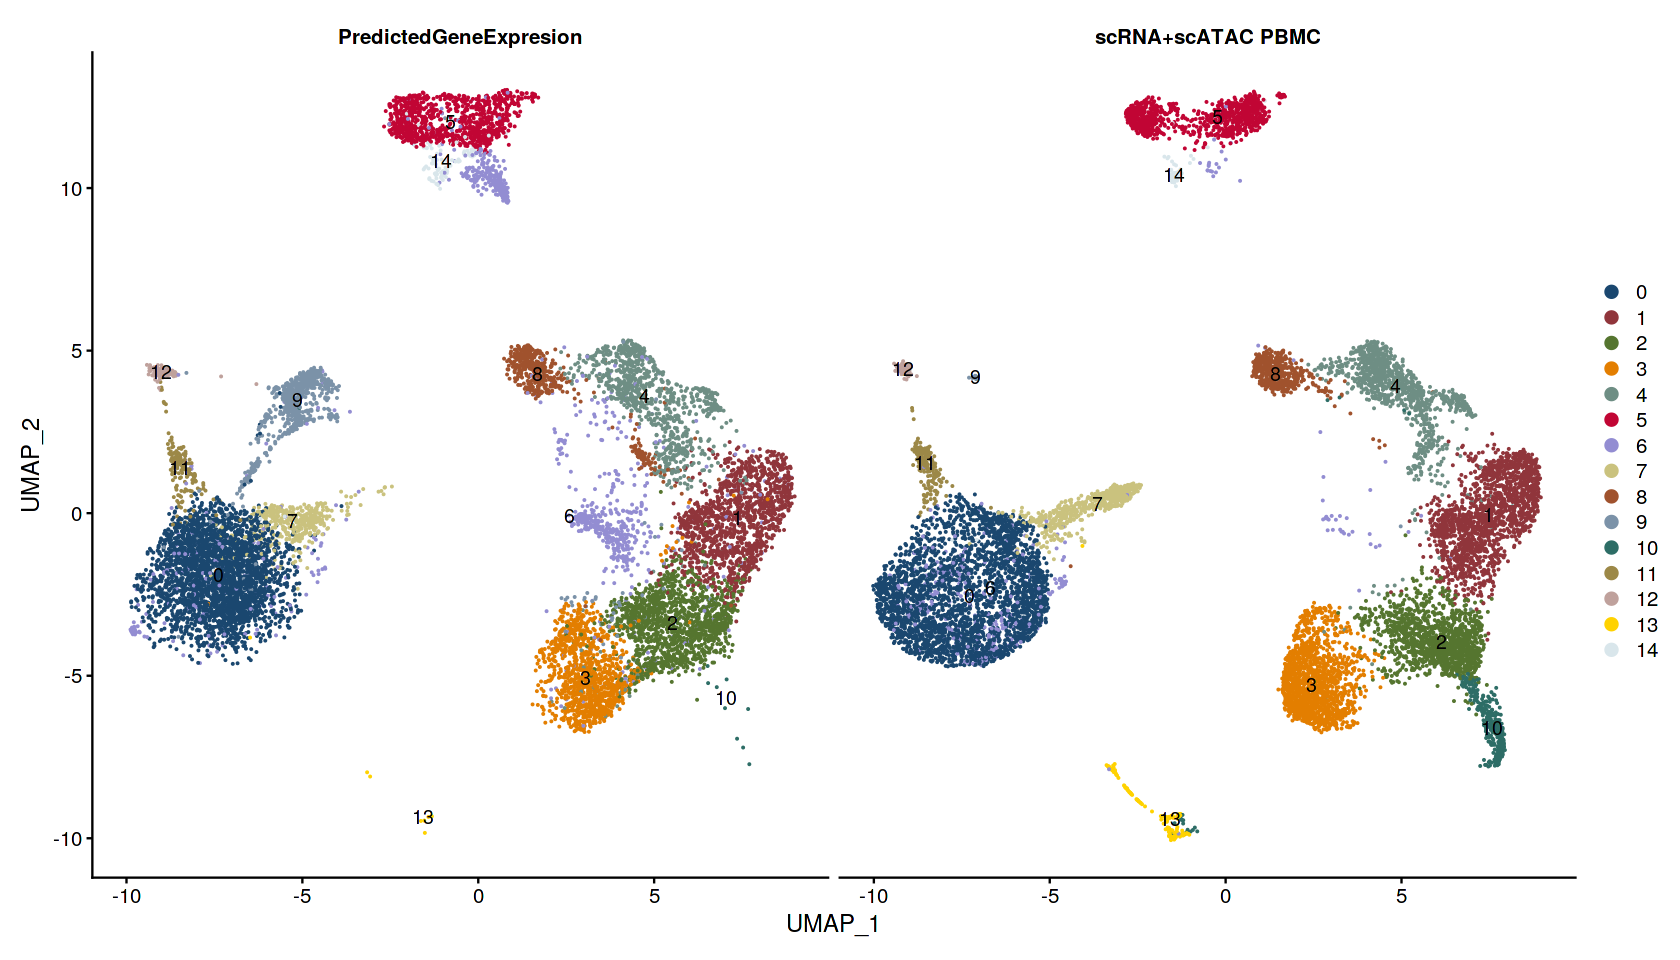

In [118]:
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot() + 
    geom_point(data = umap_tx[umap_tx$tx == "PredictedGeneExpresion",],
               aes(x=UMAP_1, y=UMAP_2, color=tx)) + 
    geom_point(data = umap_tx[umap_tx$tx == "scRNA+scATAC PBMC",],
               aes(x=UMAP_1, y=UMAP_2, color=tx)) + 
    theme_classic() +
    scale_color_stata()
ggsave("pca_umap_pred_bottom.svg")

ggplot() + 
    geom_point(data = umap_tx[umap_tx$tx == "PredictedGeneExpresion",],
               aes(x=UMAP_1, y=UMAP_2, color=tx), show.legend = FALSE) + 
    geom_point(data = umap_tx[umap_tx$tx == "scRNA+scATAC PBMC",],
               aes(x=UMAP_1, y=UMAP_2, color=tx), show.legend = FALSE) + 
    theme_classic() +
    scale_color_stata()
ggsave("pca_umap_pred_bottom_nolegend.svg")

ggplot() +
    geom_point(data = umap_tx[umap_tx$tx == "scRNA+scATAC PBMC",], 
               aes(x=UMAP_1, y=UMAP_2, color=tx)) + 
    geom_point(data = umap_tx[umap_tx$tx == "PredictedGeneExpresion",],
               aes(x=UMAP_1, y=UMAP_2, color=tx)) +
    scale_color_manual(values=c("PredictedGeneExpresion" = "darkcyan", 
                                "scRNA+scATAC PBMC" = "darkorange")) +
    theme_classic() +
    scale_color_stata()
ggsave("pca_umap_pred_top.svg")

ggplot() +
    geom_point(data = umap_tx[umap_tx$tx == "scRNA+scATAC PBMC",], 
               aes(x=UMAP_1, y=UMAP_2, color=tx), show.legend = FALSE) + 
    geom_point(data = umap_tx[umap_tx$tx == "PredictedGeneExpresion",],
               aes(x=UMAP_1, y=UMAP_2, color=tx), show.legend = FALSE) +
    scale_color_manual(values=c("PredictedGeneExpresion" = "darkcyan", 
                                "scRNA+scATAC PBMC" = "darkorange")) +
    theme_classic() +
    scale_color_stata()
ggsave("pca_umap_pred_top_nolegend.svg")

DimPlot(combinedSeurat, reduction = "umap", label = TRUE, split.by = "orig.ident") +
     scale_color_stata()
ggsave("dimplot.svg")

# d <- ggdraw()


# plot_grid(plot_grid(a, b, rel_widths = c(8, 11)), plot_grid(c, d, rel_widths = c(17, 2)), nrow = 2)

In [ ]:
umap_tx <- tibble::rownames_to_column(umap_tx, "barcode")

In [41]:
    +umap_tx

barcode,UMAP_1,UMAP_2,tx
<chr>,<dbl>,<dbl>,<chr>
ed#TCCCGGACACAAAGCG-,5.8049656,-2.5491500,PredictedGeneExpresion
ed#TTGAGCTAGTGGCGGA-,-5.1250185,3.8023477,PredictedGeneExpresion
ed#GACATTATCAGCTAAC-,-5.0724210,3.3911195,PredictedGeneExpresion
ed#TGTGCTGAGCCGCAAC-,5.8898212,-1.4233992,PredictedGeneExpresion
ed#GAGAACCAGGGCTTTG-,-4.3177918,3.9895540,PredictedGeneExpresion
ed#TCGTTAGCAATTGAAG-,-5.3009895,3.5440910,PredictedGeneExpresion
ed#CCTGTTGGTACGTTTC-,3.9845129,1.1830980,PredictedGeneExpresion
ed#ATGCCTGAGTGATTCA-,3.8132328,-0.5990531,PredictedGeneExpresion
ed#CATTGTAAGGTGCTGC-,3.1709195,-0.1651072,PredictedGeneExpresion


In [77]:
pgex <- umap_tx[umap_tx$tx == "PredictedGeneExpresion",] %>% 
    dplyr::rename("UMAP_1_predicted" = "UMAP_1", "UMAP_2_predicted" = "UMAP_2", "tx_predicted" = "tx") %>% 
    dplyr::mutate(barcode = gsub("ed#", "", barcode)) %>% 
    dplyr::mutate(barcode = gsub("-", "-1", barcode))
agex <- umap_tx[umap_tx$tx == "scRNA+scATAC PBMC",] %>% 
    dplyr::rename("UMAP_1_actual" = "UMAP_1", "UMAP_2_actual" = "UMAP_2", "tx_actual" = "tx")
head(pgex)
head(agex)

,barcode,UMAP_1_predicted,UMAP_2_predicted,tx_predicted
,<chr>,<dbl>,<dbl>,<chr>
1,TCCCGGACACAAAGCG-1,5.804966,-2.549150,PredictedGeneExpresion
2,TTGAGCTAGTGGCGGA-1,-5.125018,3.802348,PredictedGeneExpresion
3,GACATTATCAGCTAAC-1,-5.072421,3.391120,PredictedGeneExpresion
4,TGTGCTGAGCCGCAAC-1,5.889821,-1.423399,PredictedGeneExpresion
5,GAGAACCAGGGCTTTG-1,-4.317792,3.989554,PredictedGeneExpresion
6,TCGTTAGCAATTGAAG-1,-5.300990,3.544091,PredictedGeneExpresion


,barcode,UMAP_1_actual,UMAP_2_actual,tx_actual
,<chr>,<dbl>,<dbl>,<chr>
11917,AAACAGCCAAGGAATC-1,3.964598,-3.3655617,scRNA+scATAC PBMC
11918,AAACAGCCAATCCCTT-1,8.104583,0.7420406,scRNA+scATAC PBMC
11919,AAACAGCCAATGCGCT-1,4.690889,-3.6381411,scRNA+scATAC PBMC
11920,AAACAGCCACACTAAT-1,2.657138,-6.4717831,scRNA+scATAC PBMC
11921,AAACAGCCACCAACCG-1,2.667470,-5.3371305,scRNA+scATAC PBMC
11922,AAACAGCCAGGATAAC-1,5.788902,-4.0565903,scRNA+scATAC PBMC


In [81]:
dplyr::inner_join(pgex, agex, by = "barcode")

barcode,UMAP_1_predicted,UMAP_2_predicted,tx_predicted,UMAP_1_actual,UMAP_2_actual,tx_actual
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
TTGTTTGGTCAAGACC-1,-0.83297587,10.25658467,PredictedGeneExpresion,2.307217,-4.00214217,scRNA+scATAC PBMC
GTACAATGTCCGCTGT-1,-5.46936978,-1.98858139,PredictedGeneExpresion,6.957123,-1.14764163,scRNA+scATAC PBMC
TATCGCGAGCTTGCTC-1,0.14432160,10.73105385,PredictedGeneExpresion,4.525534,2.08742406,scRNA+scATAC PBMC
CAAGTATGTTTGGCGG-1,-5.18416107,3.32615140,PredictedGeneExpresion,2.445286,-4.79176471,scRNA+scATAC PBMC
AATTGGACATGCTTAG-1,7.39004623,-1.87722216,PredictedGeneExpresion,5.080731,-2.67019603,scRNA+scATAC PBMC
CCTTATGTCGTAATCA-1,-4.20527161,2.97454717,PredictedGeneExpresion,-6.206304,-3.71663616,scRNA+scATAC PBMC
CTATGAGGTGAACAAA-1,0.69164547,9.89752629,PredictedGeneExpresion,-7.255201,-0.06899781,scRNA+scATAC PBMC
TAGCCTTGTTTGCGCC-1,5.30779945,1.57254639,PredictedGeneExpresion,8.020771,0.51352831,scRNA+scATAC PBMC
CTGGATGTCTCCATGC-1,2.86054289,-5.04066083,PredictedGeneExpresion,-8.601021,-2.73668406,scRNA+scATAC PBMC
